In [2]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load and Combine Datasets
twitter_data = pd.read_csv("Twitter_Data.csv")
reddit_data = pd.read_csv("Reddit_Data.csv")

In [4]:
# Combine datasets
data = pd.concat([twitter_data, reddit_data], ignore_index=True)

In [5]:
# Step 2: Inspect Combined Dataset
print("Combined Dataset Columns:", data.columns)
print(data.head())

Combined Dataset Columns: Index(['clean_text', 'category', 'clean_comment'], dtype='object')
                                          clean_text  category clean_comment
0  when modi promised “minimum government maximum...      -1.0           NaN
1  talk all the nonsense and continue all the dra...       0.0           NaN
2  what did just say vote for modi  welcome bjp t...       1.0           NaN
3  asking his supporters prefix chowkidar their n...       1.0           NaN
4  answer who among these the most powerful world...       1.0           NaN


In [6]:
# Ensure the required columns are present
if "clean_text" not in data.columns or "category" not in data.columns:
    raise KeyError("The columns 'clean_text' or 'category' are missing in the combined dataset.")

In [7]:
# Step 3: Handle Missing Values
print("\nChecking Missing Values:")
print(data.isnull().sum())
data.dropna(subset=["clean_text", "category"], inplace=True)


Checking Missing Values:
clean_text        37253
category              7
clean_comment    163080
dtype: int64


In [8]:
# Step 4: Clean Text Data (Optional)
# If further cleaning is needed for 'clean_text', it can be applied here.
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

data["clean_text"] = data["clean_text"].astype(str).apply(clean_text)

In [9]:
# Step 5: Map Categories to Sentiments
# Convert `category` column values to 0, 1, 2 for classification
category_mapping = {-1: 0, 0: 1, 1: 2}  # Negative = 0, Neutral = 1, Positive = 2
data["category"] = data["category"].map(category_mapping)

In [10]:
# Step 6: Split Data into Train and Test Sets
X = data["clean_text"]
y = data["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 7: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
# Step 8: Train Logistic Regression Model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Step 9: Make Predictions
y_pred = model.predict(X_test_tfidf)

In [14]:
# Step 10: Evaluate the Model
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"]))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.79      0.84      7152
     Neutral       0.89      0.97      0.93     11067
    Positive       0.93      0.92      0.93     14375

    accuracy                           0.91     32594
   macro avg       0.91      0.90      0.90     32594
weighted avg       0.91      0.91      0.91     32594


Accuracy Score: 0.9106584033871264


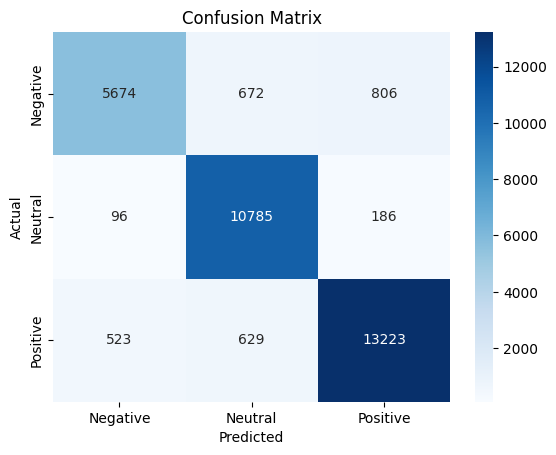

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Negative", "Neutral", "Positive"], 
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# Step 11: Save Predictions
output = pd.DataFrame({"clean_text": X_test, "actual_category": y_test, "predicted_category": y_pred})
output.to_csv("sentiment_predictions.csv", index=False)

print("\nPredictions saved to 'sentiment_predictions.csv'")


Predictions saved to 'sentiment_predictions.csv'
